<a href="https://colab.research.google.com/github/venkatesh-manikumar/Datascience-Assignments/blob/main/Black_Friday_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [386]:
from google.colab import drive
#drive.mount('/content/drive')

In [437]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import joblib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression , Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

In [388]:
train_data = pd.read_csv('/content/drive/MyDrive/DataScience/Black_friday_sales_prediction/train.csv')
test_data  =  pd.read_csv('/content/drive/MyDrive/DataScience/Black_friday_sales_prediction/test.csv')
data = pd.concat([train_data,test_data])
train_data.shape , test_data.shape , data.shape, data.shape[0] + data.shape[0]

((550068, 12), (233599, 11), (783667, 12), 1567334)

In [389]:
data.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0


In [390]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [391]:
num_cols = ['Occupation','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']
cat_cols = ['Gender','Age','City_Category','Stay_In_Current_City_Years']

In [392]:
train_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [393]:
train_data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [394]:
train_data[train_data.Product_Category_2.isna() & train_data.Product_Category_3.isna()][['Product_ID','Product_Category_1','Product_Category_2','Product_Category_3']].head(2)

,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3
0,P00069042,3,NaN,NaN
2,P00087842,12,NaN,NaN


In [395]:
train_data[train_data.Product_ID== 'P00069042'][['Product_ID','Product_Category_1','Product_Category_2','Product_Category_3']].drop_duplicates()

,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3
0,P00069042,3,NaN,NaN


In [396]:
#df = test_data[test_data.Product_ID == 'P00069042'][['Product_ID','Product_Category_1','Product_Category_2','Product_Category_3']]
df = test_data[test_data.Product_ID== 'P00069042'][['Product_ID','Product_Category_1','Product_Category_2','Product_Category_3']].drop_duplicates()
df

,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3
4362,P00069042,3,NaN,NaN


# EDA - Univariate

<Axes: ylabel='Gender'>

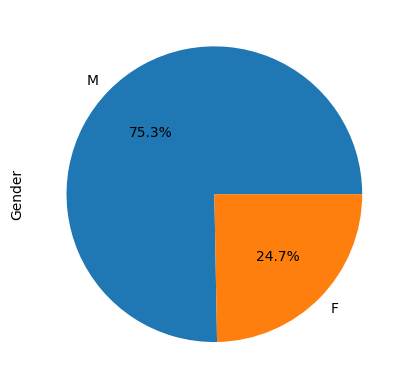

In [397]:
data['Gender'].value_counts().plot.pie(autopct = '%1.1f%%')

<Axes: ylabel='Marital_Status'>

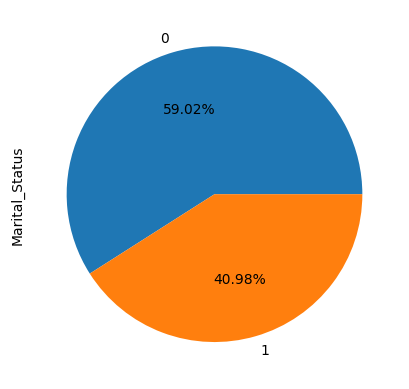

In [398]:
data['Marital_Status'].value_counts().plot.pie(autopct = '%1.2f%%')

<Axes: ylabel='City_Category'>

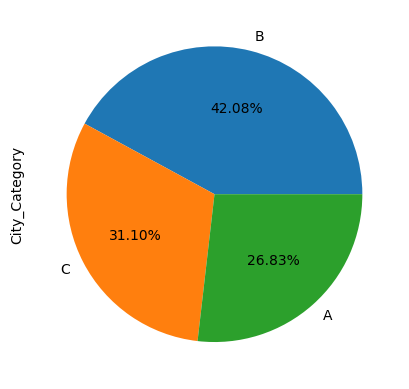

In [399]:
data['City_Category'].value_counts().plot.pie(autopct = '%1.2f%%')

<Axes: xlabel='Age', ylabel='count'>

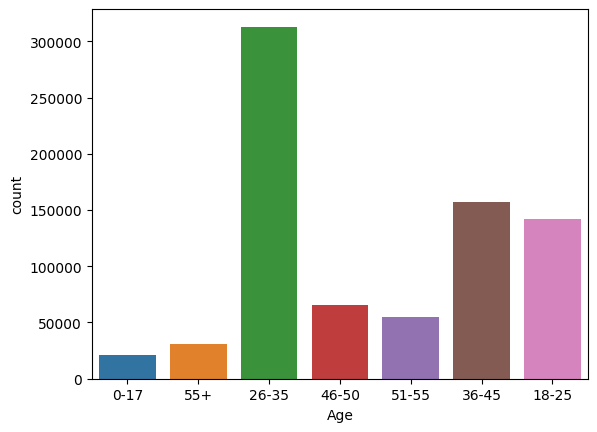

In [400]:
sns.countplot(x='Age',data=data)

<Axes: ylabel='Age'>

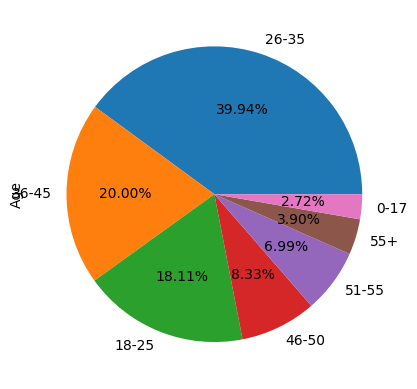

In [401]:
data['Age'].value_counts().plot.pie(autopct = '%1.2f%%')

In [402]:
#sns.countplot(x='Product_Category_1',data=data)

#EDA - Bivariate

Age : 51-55 having high purchase value

In [403]:
#sns.catplot(x='Age',y='Purchase',data=data, kind='point')

Male is having high purchase value

In [404]:
#sns.catplot(x='Gender',y='Purchase',data=data, kind='point')

City_Category - C - having high purchase value

In [405]:
#sns.catplot(x='City_Category',y='Purchase',data=data, kind='point')

Occupation -15 - having high purchase value

In [406]:
#sns.catplot(x='Occupation',y='Purchase',data=data, kind='point')

# Pre-processing

In [407]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [408]:
data[['Product_Category_2','Product_Category_3']].isnull().sum().values / data.shape[0] * 100

array([31.38858724, 69.64807756])

In [409]:
cat_encode = Pipeline(steps = [
                     ('ohe',OneHotEncoder(sparse_output=False,handle_unknown='ignore'))
                              ])

num_encode = Pipeline(steps = [
                                ('impute',SimpleImputer(strategy='mean')),
                                ('minmax',MinMaxScaler()),

                              ])

In [410]:
full_encode = ColumnTransformer(
    transformers = [
        ('category',cat_encode,cat_cols),
        ('numeric',num_encode,num_cols)
                   ])

In [420]:
pipe = Pipeline([('preprocess',full_encode)])
#data.drop(columns=['User_ID','Product_ID','Purchase'],inplace=True)
pipe.fit(data)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('category',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'Age',
                                                   'City_Category',
                                                   'Stay_In_Current_City_Years']),
                                                 ('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('minmax',
                                                                   MinMaxScaler())]),
                                                  ['Occupation',
                                                   'Marital_Status',
                                                   'Product_Category_1',
                                                   'Product_Category_2',
                                                   'Product_Category_3'])]))])

In [423]:
pipe_enc_mdl = Pipeline([('preprocess',full_encode),('model',LinearRegression())])

In [425]:
x = train_data.drop(columns =['User_ID','Product_ID','Purchase'])
y = train_data[['Purchase']]

In [433]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.2,random_state=42)
pipe_enc_mdl.fit(train_x,train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('category',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'Age',
                                                   'City_Category',
                                                   'Stay_In_Current_City_Years']),
                                                 ('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('minmax',
                                                                   MinMaxScaler())]),
                                                  ['Occupation',
                                                   'Marital_Status',
                                                   'Product_Category_1',
                                                   'Product_Category_2',
                                                   'Product_Category_3'])])),
                ('model', LinearRegression())])

In [435]:
predict_val_y = pipe_enc_mdl.predict(val_x)
mean_squared_error(val_y,predict_val_y,squared = False)

4679.50534390734

In [467]:
from sklearn.model_selection import GridSearchCV

params = {'model': [Ridge(),Lasso()], 'model__alpha':[1,2,3,4,5] #,'model__normalize':[True,False]
          }

In [468]:
grid = GridSearchCV(estimator =pipe_enc_mdl, param_grid =params, scoring ='neg_mean_squared_error',cv=2,verbose=0  )

In [469]:
grid.fit(train_x,train_y)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('category',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Gender',
                                                                          'Age',
                                                                          'City_Category',
                                                                          'Stay_In_Current_City_Years']),
                                                                        ('numeric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('minmax',
                                                                                          MinMaxScaler())]),
                                                                         ['Occupation',
                                                                          'Marital_Status',
                                                                          'Product_Category_1',
                                                                          'Product_Category_2',
                                                                          'Product_Category_3'])])),
                                       ('model', LinearRegression())]),
             param_grid={'model': [Ridge(alpha=2), Lasso()],
                         'model__alpha': [1, 2, 3, 4, 5]},
             scoring='neg_mean_squared_error')

In [470]:
grid_pred_val_y = grid.predict(val_x)
mean_squared_error(val_y,grid_pred_val_y,squared = False)

4679.416523094687

In [471]:
grid.best_params_

{'model': Ridge(alpha=2), 'model__alpha': 2}

In [472]:
grid.best_score_

-21991384.8026594

In [473]:
grid.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('category',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'Age',
                                                   'City_Category',
                                                   'Stay_In_Current_City_Years']),
                                                 ('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('minmax',
                                                                   MinMaxScaler())]),
                                                  ['Occupation',
                                                   'Marital_Status',
                                                   'Product_Category_1',
                                                   'Product_Category_2',
                                                   'Product_Category_3'])])),
                ('model', Ridge(alpha=2))])